In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DataSet\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.shape

(299, 13)

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
target = 'DEATH_EVENT'

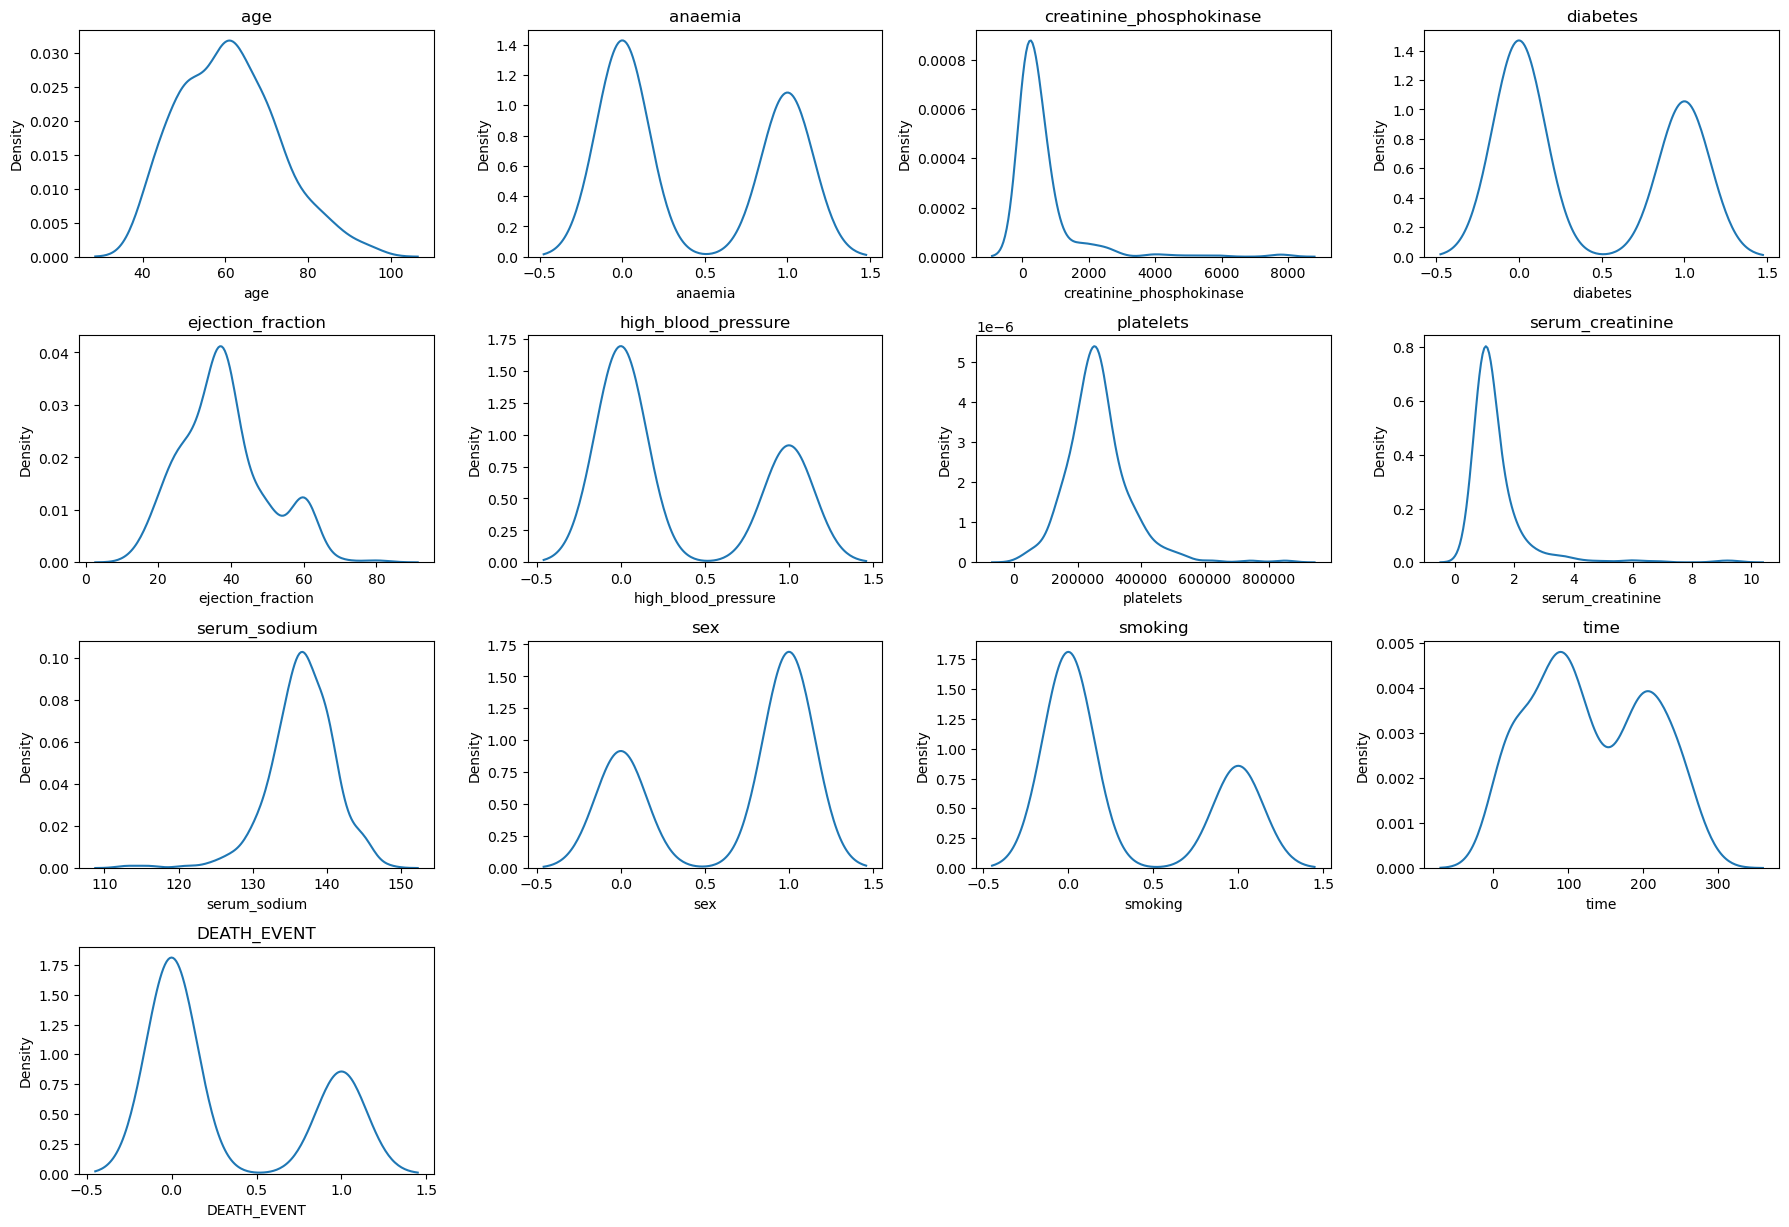

In [10]:
plt.figure(figsize= (18,15))
for i,col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

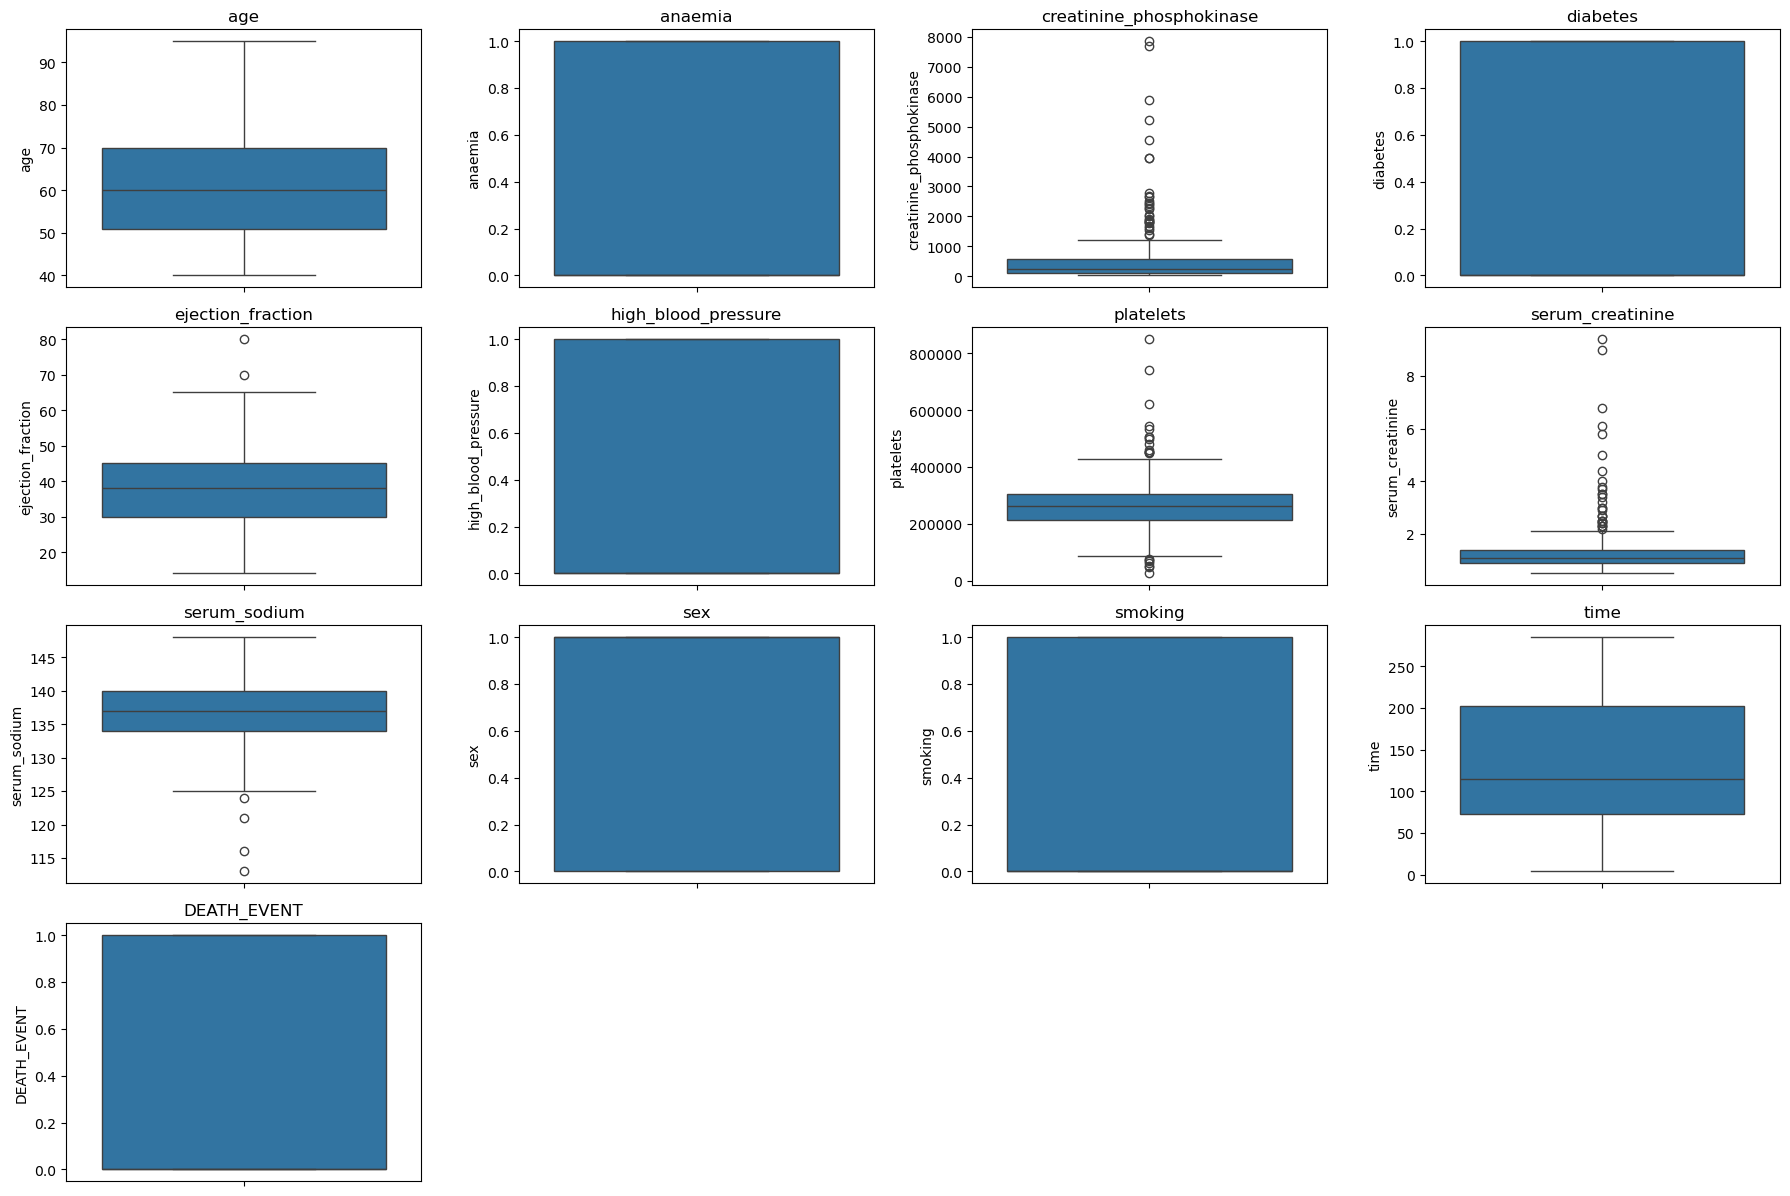

In [11]:
plt.figure(figsize= (18,15))
for i,col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
selected_cols = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

for col in selected_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower =Q1-1.5*IQR
    upper = Q3+1.5*IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    

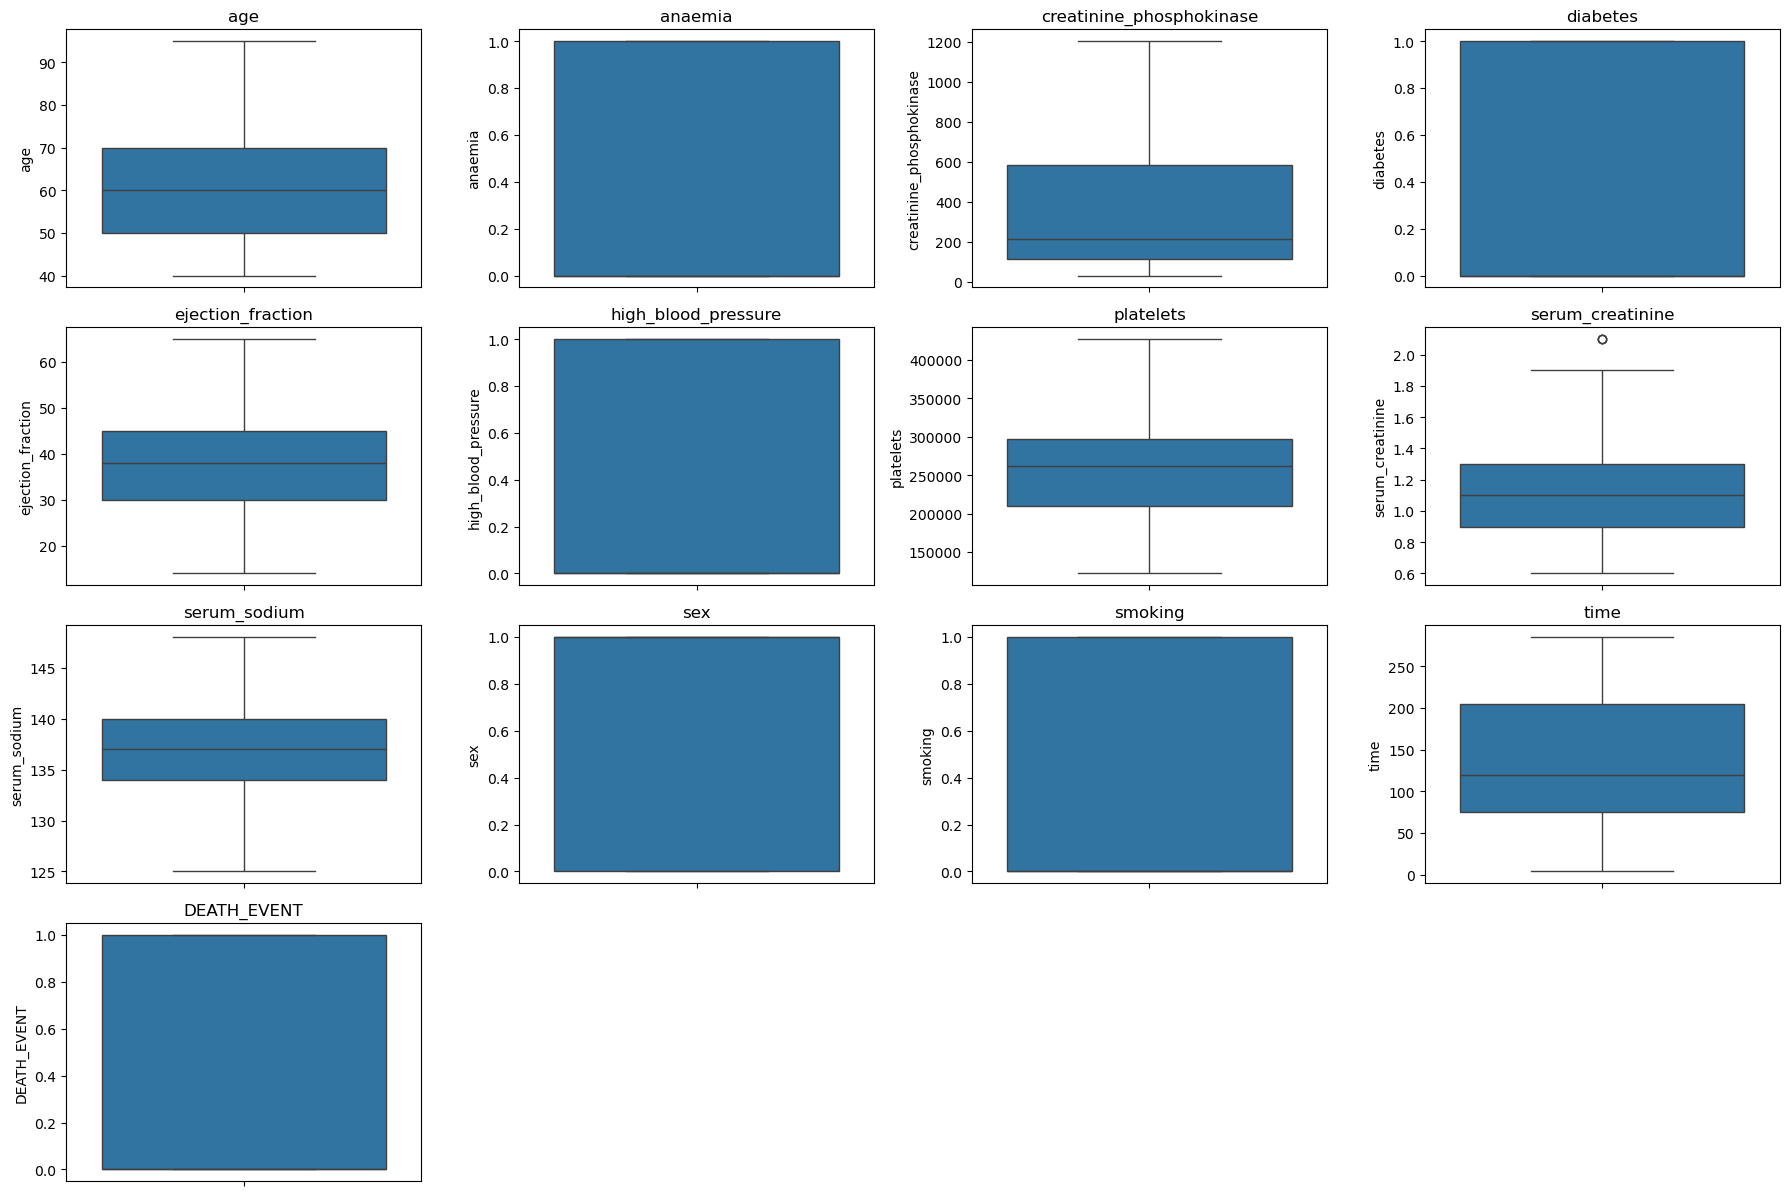

In [13]:
plt.figure(figsize= (18,15))
for i,col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

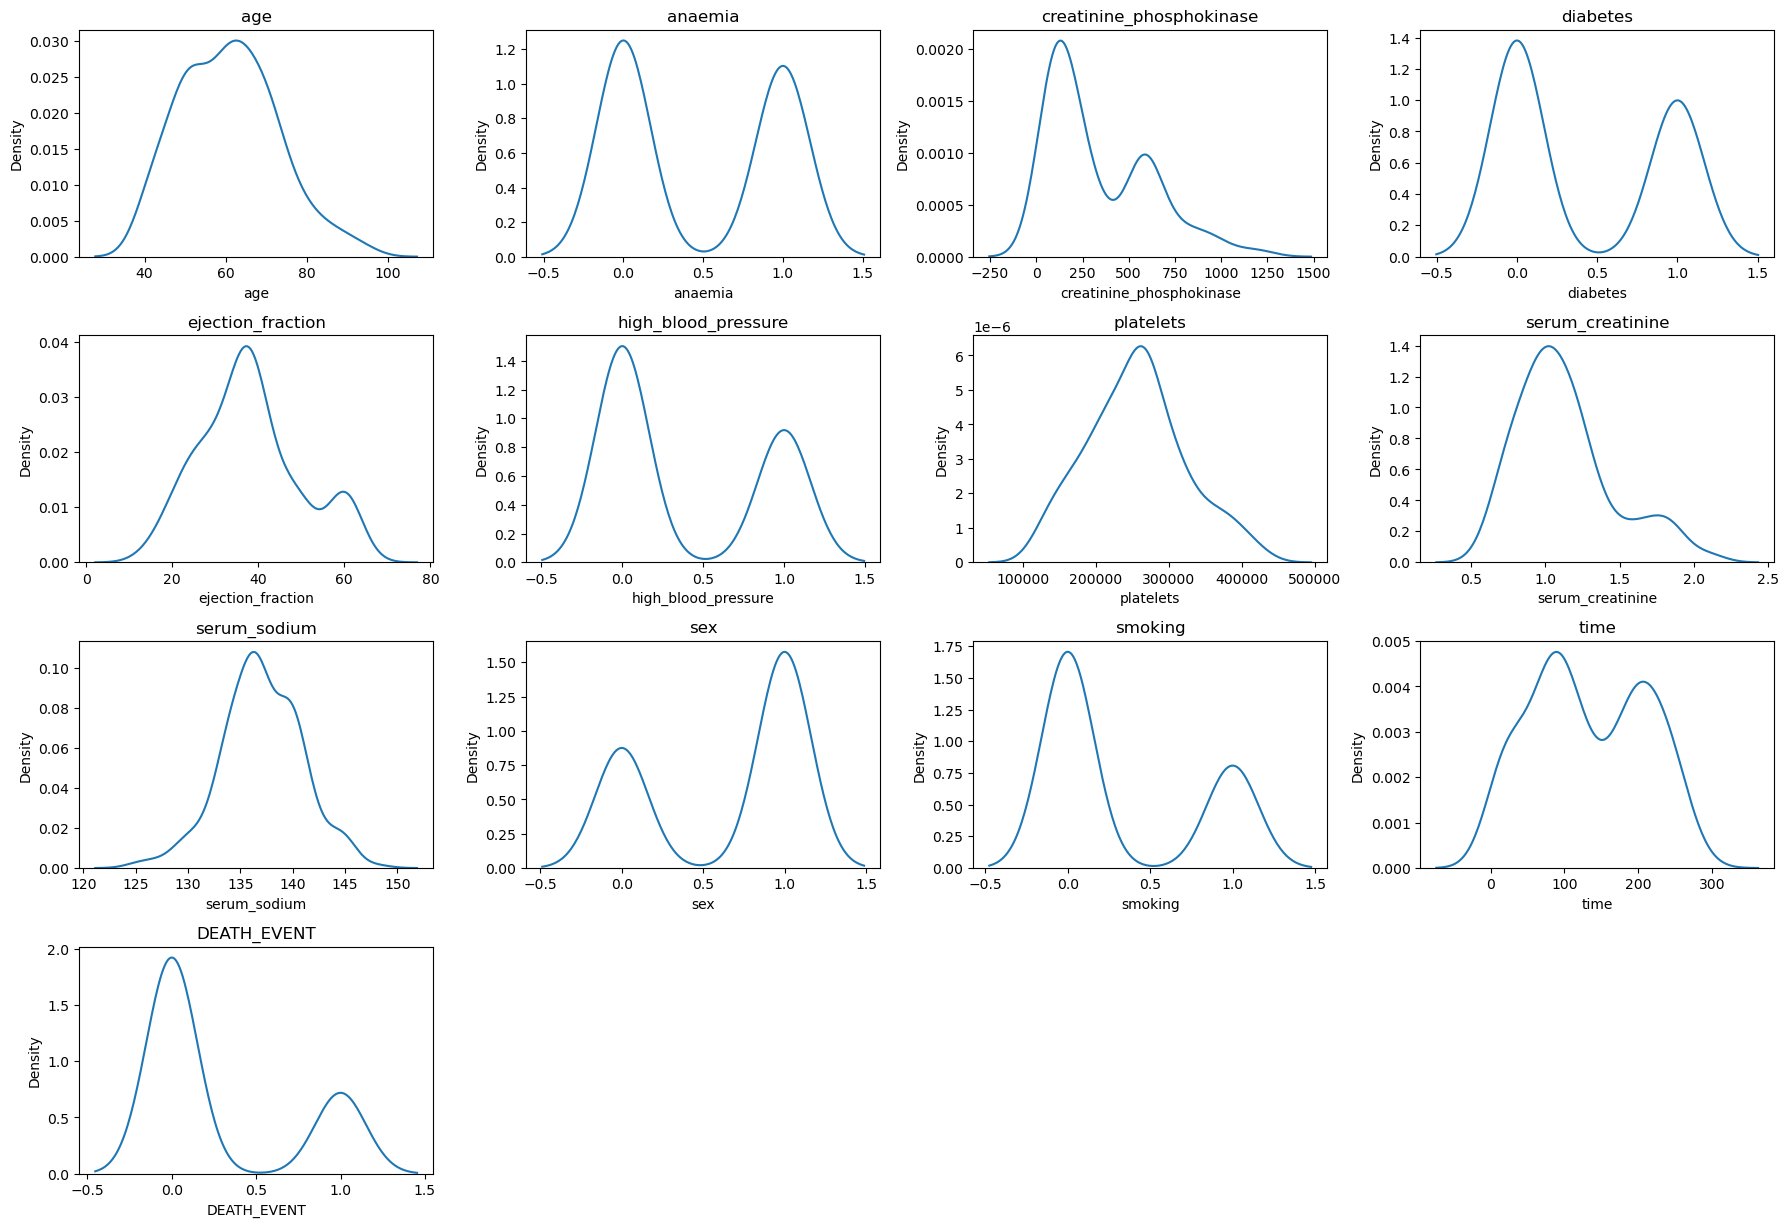

In [14]:
plt.figure(figsize= (18,15))
for i,col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

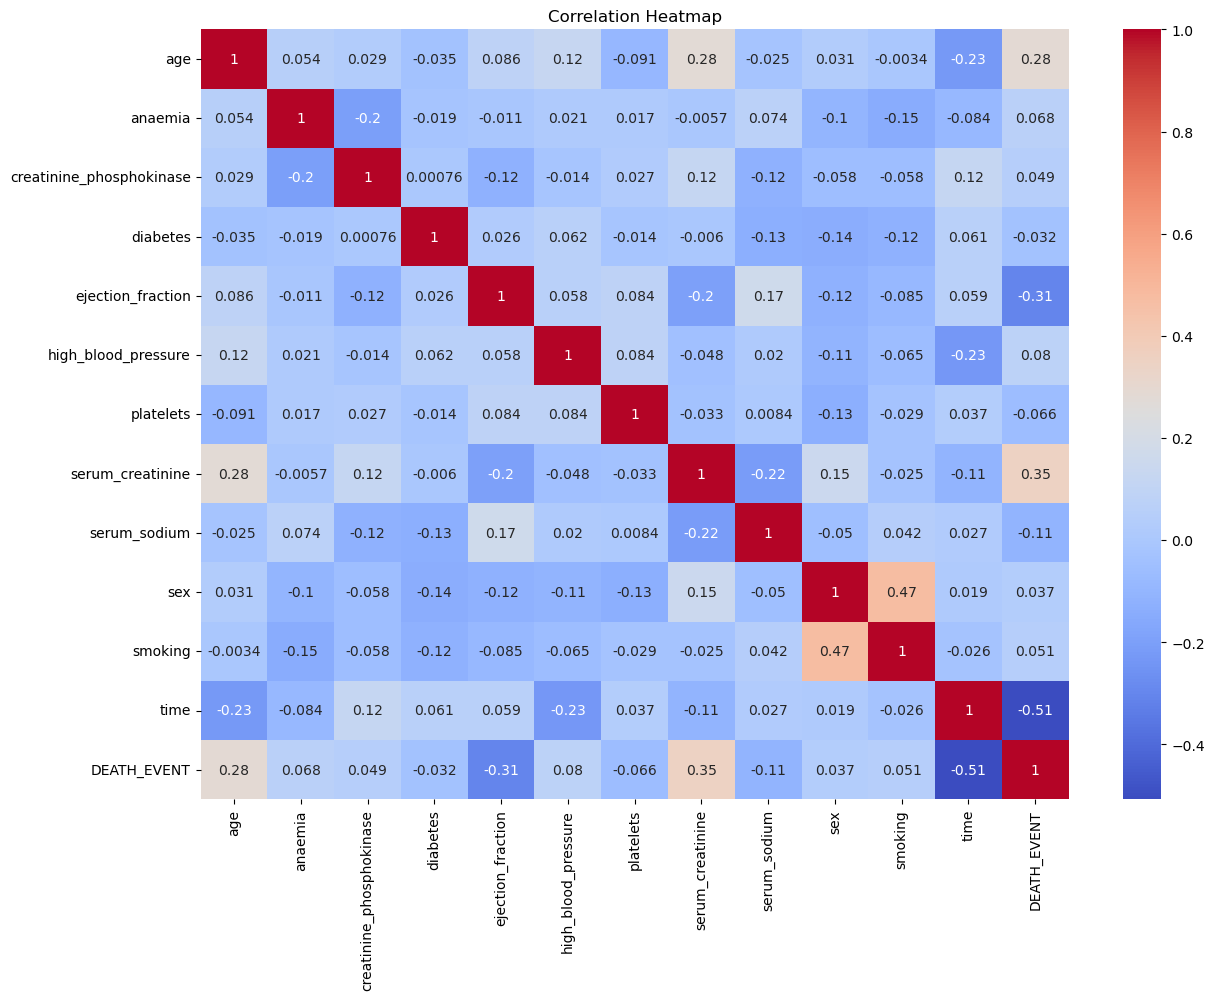

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df.corr()[target]

age                         0.282100
anaemia                     0.068454
creatinine_phosphokinase    0.048815
diabetes                   -0.032478
ejection_fraction          -0.305454
high_blood_pressure         0.079622
platelets                  -0.065993
serum_creatinine            0.348548
serum_sodium               -0.112804
sex                         0.037374
smoking                     0.051383
time                       -0.507905
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [17]:
X = df.drop(columns = (target),axis=1)
y = df[target]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss"
    )
}

In [22]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.866667
6,XGBoost,0.822222
0,Logistic Regression,0.777778
1,Decision Tree,0.777778
3,Gradient Boosting,0.777778
4,SVM,0.733333
5,KNN,0.688889


In [23]:
best_model_name = results_df.sort_values(
    by="Accuracy", ascending=False
).iloc[0]["Model"]

best_model = models[best_model_name]
best_model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = best_model.predict(X_test)

print(
    classification_report(
        y_test,
        y_pred
    )
)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.88      0.58      0.70        12

    accuracy                           0.87        45
   macro avg       0.87      0.78      0.81        45
weighted avg       0.87      0.87      0.86        45

